In [1]:
import numpy as np
import h5py
from scipy import io
import matplotlib.pyplot as plt
from cfr import task
import importlib
sem_file = '/Users/morton/PycharmProjects/cmr_cfr/data/cfr_wikiw2v_raw.mat'
out_file = '/Users/morton/PycharmProjects/cmr_cfr/data/cfr_wikiw2v_raw.npz'
h5_file = '/Users/morton/PycharmProjects/cmr_cfr/data/cfr_patterns.hdf5'

In [2]:
task.write_patterns_w2v(sem_file, h5_file)

dict_keys(['items', 'vectors', 'similarity'])


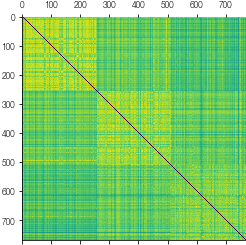

In [2]:
mat = task.read_similarity(sem_file)
print(mat.keys())
plt.matshow(mat['similarity']);

In [3]:
category = np.repeat(['cel', 'loc', 'obj'], 256)
loc_patterns = np.eye(mat['items'].shape[0])
cat_patterns = np.zeros((mat['items'].shape[0], 3))
cat_names = np.unique(category)
for i in range(3):
    cat_patterns[category == cat_names[i], i] = 1
vectors = mat['vectors'] - np.min(mat['vectors'])
sem_patterns = vectors / np.linalg.norm(vectors, ord=2, axis=1)[:, None]
# vectors = stats.zscore(mat['vectors'], axis=1)

In [6]:
patterns = {'loc': loc_patterns, 'cat': cat_patterns, 'w2v': sem_patterns}
task.write_patterns(h5_file, mat['items'], patterns)

cat (768, 3)
loc (768, 768)
w2v (768, 300)


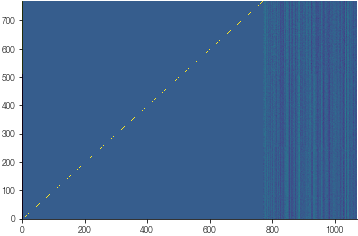

In [3]:
x_list = []
with h5py.File(h5_file, 'r') as f:
    for name, pattern in f['pattern'].items():
        print(name, pattern.shape)
        x_list.append(pattern[()])
x = np.hstack(x_list)
plt.pcolor(x)

In [15]:
pat = {}
with h5py.File(h5_file, 'r') as f:
    for name, pattern in f['pattern'].items():
        print(name, pattern.shape)
        pat[name] = pattern[()]

cat (768, 3)
loc (768, 768)
w2v (768, 300)


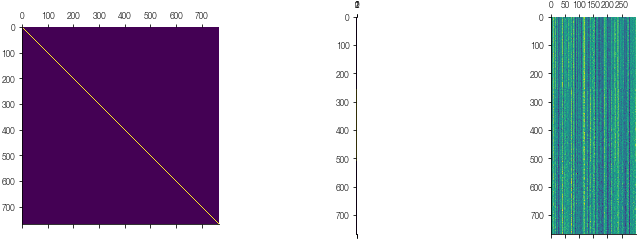

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4));
ax[0].matshow(pat['loc']);
ax[1].matshow(pat['cat']);
ax[2].matshow(pat['w2v']);

In [11]:
sim = {}
with h5py.File(h5_file, 'r') as f:
    for name, pattern in f['similarity'].items():
        print(name, pattern.shape)
        sim[name] = pattern[()]

cat (768, 768)
loc (768, 768)
w2v (768, 768)


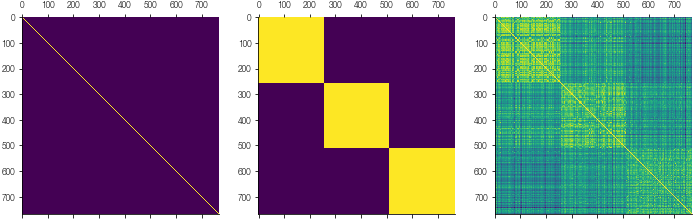

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4));
ax[0].matshow(sim['loc']);
ax[1].matshow(sim['cat']);
ax[2].matshow(sim['w2v']);

In [10]:
np.linalg.norm(x[:, 771:], ord=2, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

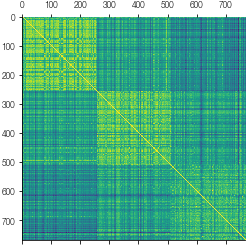

In [52]:
from scipy import stats
z = stats.zscore(vectors, axis=1) / np.sqrt(vectors.shape[1])
zn = z / np.linalg.norm(z, ord=2, axis=1)[:, None]
dot = np.dot(zn, zn.T)
dot_norm = dot / len(dot)
plt.matshow(dot)

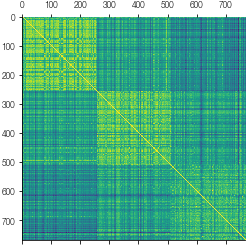

In [50]:
from scipy.spatial import distance
sim = 1 - distance.squareform(distance.pdist(vectors, 'correlation'))
plt.matshow(sim)

In [53]:
print(sim[:4, :4])
print(dot[:4, :4])

[[1.         0.70587905 0.92861643 0.75076714]
 [0.70587905 1.         0.75292857 0.9202495 ]
 [0.92861643 0.75292857 1.         0.78316767]
 [0.75076714 0.9202495  0.78316767 1.        ]]
[[1.         0.70587905 0.92861643 0.75076714]
 [0.70587905 1.         0.75292857 0.9202495 ]
 [0.92861643 0.75292857 1.         0.78316767]
 [0.75076714 0.9202495  0.78316767 1.        ]]


In [42]:
sim = 1 - distance.squareform(distance.pdist(loc_patterns, 'correlation'))
sim[0, 0]

1.0

In [100]:
with h5py.File(h5_file, 'w') as f:
    dt = h5py.special_dtype(vlen=str)
    dset = f.create_dataset('items', mat['items'].shape, dtype=dt)
    for i, item in enumerate(mat['items']):
        dset[i] = item
    f.create_dataset('patterns/loc', data=loc_patterns)
    f.create_dataset('patterns/cat', data=cat_patterns)
    f.create_dataset('patterns/w2v', data=sem_patterns)

In [118]:
np.linalg.norm(sim[:10, :10], ord=2, axis=1)[:, None].shape

(10, 1)

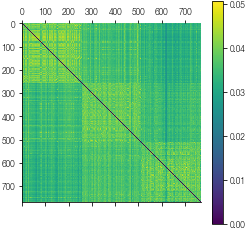

In [122]:
sim = mat['similarity']
sim -= np.min(sim)
sim /= np.linalg.norm(sim, ord=2, axis=1)[:, None]
plt.matshow(sim);
plt.colorbar();

In [103]:
with h5py.File(h5_file, 'r') as f:
    for name, pattern in f['patterns'].items():
        print(name, pattern.shape)

cat (768, 3)
loc (768, 768)
w2v (768, 300)


In [73]:
from scipy.spatial import distance
distance.squareform(distance.pdist(cat_patterns, 'hamming'))

array([[0.        , 0.        , 0.        , ..., 0.66666667, 0.66666667,
        0.66666667],
       [0.        , 0.        , 0.        , ..., 0.66666667, 0.66666667,
        0.66666667],
       [0.        , 0.        , 0.        , ..., 0.66666667, 0.66666667,
        0.66666667],
       ...,
       [0.66666667, 0.66666667, 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.66666667, 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.66666667, 0.66666667, ..., 0.        , 0.        ,
        0.        ]])

In [66]:
patterns = {'loc': loc_patterns, 'cat': cat_patterns, 'sem': sem_patterns}
similarity = {'sem': }
np.savez(out_file, items=mat['items'], category=category,
         vectors=vectors, similarity=mat['similarity'])

In [71]:
mat = np.load(out_file)
print(np.min(mat['vectors']), np.max(mat['vectors']))
mat['vectors'].shape

0.0 0.42613702957747845


(768, 300)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

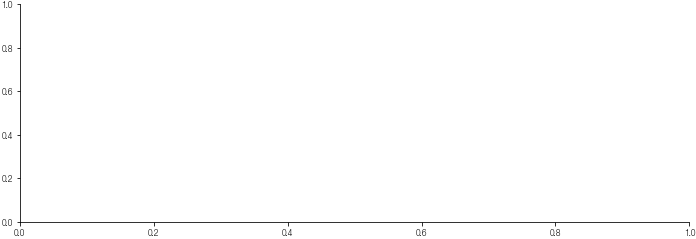

In [69]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.pcolor(np.hstack((mat['vectors'], mat['category'])));